In [2]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("C://Users//Koyel//Desktop/MieRobotAdvert.csv")

dataset.head()

,Unnamed: 0,Facebook,Google,Twitter,Hits
0,1,161.07,26.46,48.44,15.47
1,2,31.15,27.51,31.57,7.28
2,3,12.04,32.13,48.51,6.51
3,4,106.05,28.91,40.95,12.95
4,5,126.56,7.56,40.88,9.03


In [3]:
dataset.describe()

,Unnamed: 0,Facebook,Google,Twitter,Hits
count,200.000000,200.000000,200.000000,200.000000,200.00000
mean,100.500000,102.929750,16.284800,21.387800,9.81575
std,57.879185,60.097965,10.392766,15.245035,3.65222
min,1.000000,0.490000,0.000000,0.210000,1.12000
25%,50.750000,52.062500,6.982500,8.925000,7.26250
50%,100.500000,104.825000,16.030000,18.025000,9.03000
75%,150.250000,153.177500,25.567500,31.570000,12.18000
max,200.000000,207.480000,34.720000,79.800000,18.90000


In [4]:
dataset.columns

Index(['Unnamed: 0', 'Facebook', 'Google', 'Twitter', 'Hits'], dtype='object')

C:\Users\koyel\Anaconda3\envs\tensorflow\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


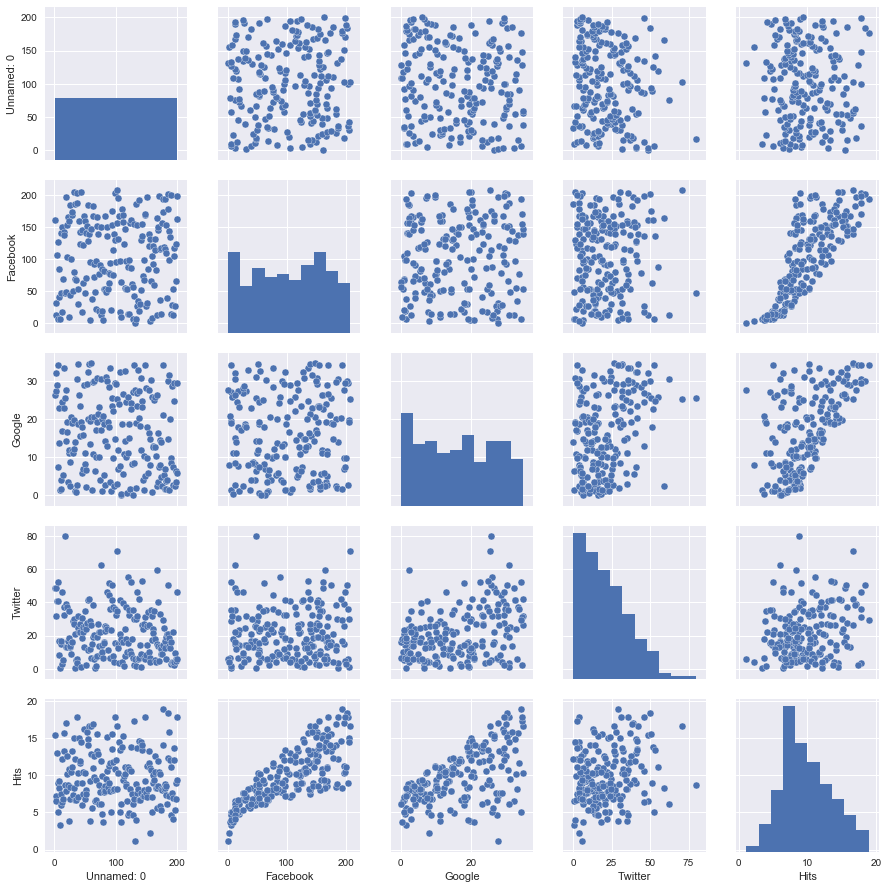

In [5]:
import seaborn as sns
%matplotlib inline
sns.pairplot(dataset)

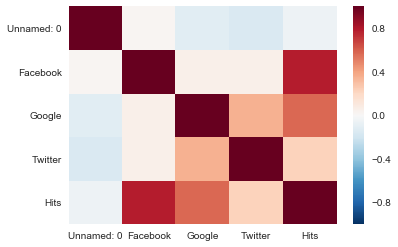

In [6]:
sns.heatmap(dataset.corr())

In [7]:
dataset.columns

Index(['Unnamed: 0', 'Facebook', 'Google', 'Twitter', 'Hits'], dtype='object')

In [8]:
X = dataset[['Facebook', 'Twitter', 'Google']]
y = dataset['Hits']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression


In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print(lm.intercept_)

2.26003417551


In [15]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Calculated Coefficient'])
coeff_df

,Calculated Coefficient
Facebook,0.044818
Twitter,0.001170
Google,0.180295


In [17]:
predictions = lm.predict(X_test)

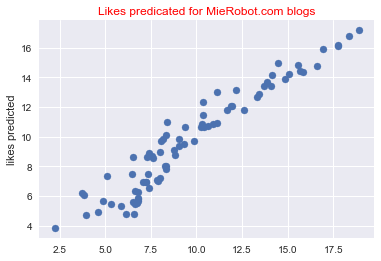

In [26]:
plt.ylabel("likes predicted")
plt.title("Likes predicated for MieRobot.com blogs",color='r')
plt.scatter(y_test,predictions)


In [23]:
print (lm.score)

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


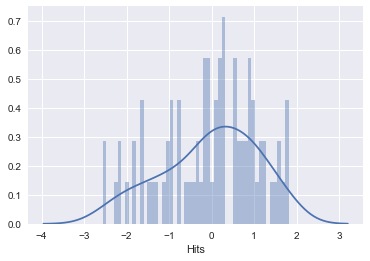

In [19]:
sns.distplot((y_test-predictions),bins=50);

In [20]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.907065834792
MSE: 1.24687124666
RMSE: 1.11663389106
